In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file_path = r'C:\Users\Mike\Desktop\ActiveSubstances.xls'

eu_pesticides_df=pd.read_excel(file_path, header=2)
eu_pesticides_df.head()

,Active Substance ID,Substance,Category,Status under Reg. (EC) No 1107/2009,Date of approval,Expiration of approval,Legislation,Remark,RMS,Co-RMS,...,Source/Year,Remark,ARfD (mg/kg bw),Source/Year.1,Remark.1,AOEL (mg/kg bw/d),Source/Year.2,Remark.2,Classification (Reg. 1272/2008),Authorised
0,351,"(4Z-9Z)-7,9-Dodecadien-1-ol",AT,Not approved,NaN,NaN,2004/129/EC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1329,(E)-10-Dodecen-1-yl acetate,AT,Not approved,NaN,NaN,2004/129/EC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,357,(E)-11-Tetradecen-1-yl acetate,AT,Approved,01/09/2009,31/08/2021,"2008/127, Reg. (EU) 2017/195, Reg. (EU) No 540...",Substance fulfilling criteria Annex VI Reg. 22...,AT,NaN,...,Dir 08/127,NaN,Not appl.,Dir 08/127,NaN,Not appl.,Dir 08/127,NaN,NaN,"ES, IT, LU"
3,358,"(E)-2-Methyl-6-methylene-2,7-octadien-1-ol (my...",NaN,Not approved,NaN,NaN,2007/442,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359,"(E)-2-Methyl-6-methylene-3,7-octadien-2-ol (is...",NaN,Not approved,NaN,NaN,NaN,Never notified and authorised in the EU,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for i in range(len(eu_pesticides_df)):
    if  eu_pesticides_df['Active Substance ID'][i] =='Status Counts': # Had to use this format as spaces in column name
        index_enddata = i
# Create a new clean dataframe by removing irrelevant row Status Count  
eu_pesticides_clean_df=eu_pesticides_df.iloc[0:index_enddata-1 , :]

In [37]:
print(eu_pesticides_clean_df)

     Active Substance ID                                          Substance  \
0                    351                        (4Z-9Z)-7,9-Dodecadien-1-ol   
1                   1329                        (E)-10-Dodecen-1-yl acetate   
2                    357                     (E)-11-Tetradecen-1-yl acetate   
3                    358  (E)-2-Methyl-6-methylene-2,7-octadien-1-ol (my...   
4                    359  (E)-2-Methyl-6-methylene-3,7-octadien-2-ol (is...   
...                  ...                                                ...   
1508                1317                                              Zineb   
1509                1008                                              Ziram   
1510                 200                                           Zoxamide   
1511                 201    Zucchini yellow mosaic virus (ZYMV mild strain)   
1512                 202         Zucchini yellow mosaic virus - weak strain   

     Category Status under Reg. (EC) No 1107/2009 D

In [33]:
eu_pesticides_clean_df.head()
print(len(eu_pesticides_df))

1544


In [14]:
eu_pesticides_clean_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Active Substance ID                  1513 non-null   object
 1   Substance                            1513 non-null   object
 2   Category                             1185 non-null   object
 3   Status under Reg. (EC) No 1107/2009  1513 non-null   object
 4   Date of approval                     590 non-null    object
 5   Expiration of approval               567 non-null    object
 6   Legislation                          1215 non-null   object
 7   Remark                               740 non-null    object
 8   RMS                                  658 non-null    object
 9   Co-RMS                               521 non-null    object
 10  Assess Risk                          586 non-null    object
 11  Reg 396/2005                         754 no

In [31]:
print(len(eu_pesticides_clean_df))

1513


In [34]:
# As column in excel sheet was missing comma at the last EU country this needed to be added to allow the string to be made

eu_pesticides_clean_comma_df=eu_pesticides_clean_df.assign(AuthorisedComma = eu_pesticides_clean_df[' Authorised'] + ',')

In [17]:
#Create a long string of all the entries in "AuthorisedComma".
total_string='' #Initialise the string
#Loop through dataframe adding each entry in "AuthorisedComma" to the string "total_string"   
for i in range(len(eu_pesticides_clean_comma_df)): 
    total_string=total_string+str(eu_pesticides_clean_comma_df['AuthorisedComma'][i])

In [35]:
print(total_string)

nannanES, IT, LU,nannanEL, ES, IT,EL, ES, IT,AT, CZ, DE, EL, ES, IT, LU, NL, PT, SI,nanCZ, EL, ES, IT,CZ, EL, ES, IT,AT, BE, CZ, DE, DK, EE, EL, ES, FI, HR, HU, IT, LU, NL, PL, PT, SE, SI,ES, PT,BE, ES, IT, PL,BE, ES, IT, PL,AT, BE, CZ, EL, ES, HU, IE, IT, NL, UK,nanAT, CY, CZ, DE, EL, ES, HU, IT, LU, MT, PT, SI,nanES, IT,CZ,BE, IT,AT, BE, CY, CZ, DE, EL, ES, HU, IE, IT, NL, UK,nanES,nanBE, IT,AT, BE, CZ, DK, EE, EL, ES, FI, HU, IT, NL, PL, SE, UK,nanES,nannannannannanAT, CZ, DE, EL, ES, HU, IT, NL, PT, SI,AT, CZ, DE, EL, ES, HU, IT, LU, NL, SI,BE, PL,BE, PL,AT, CZ, DE, HU, IT, LU, SI,ES,AT, BE, CZ, DK, EL, HU, IT, PL,nannanEL, ES,EL, ES,nannanEL,EL,nannannannannannannannannannanAT, BE, CY, CZ, DE, DK, FI, FR, HR, IE, LT, LU, LV, NL, PL, SE,nanBE, DE, EL, ES, FR, HR, HU, IT, PL, PT,nannanAT, BE, BG, CZ, DE, DK, EE, EL, ES, FR, HR, HU, IE, IT, LT, LU, NL, PT, RO, SI, SK, UK,AT, BE, CY, ES, FR, HR, IT, PL, PT, SI,AT, BE, CY, CZ, DE, EL, ES, FR, HR, IE, IT, LT, LV, MT, NL, PT, RO, SI, UK,

In [89]:
countries_list=['AT','BE','BG','CY','CZ','DE','DK','EE','ES','FI','FR','HR','HU','IE','IT','LT','LU','LV','MT','NL','PT','RO','SE','SI','SK']

In [90]:
print(countries_list)

['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PT', 'RO', 'SE', 'SI', 'SK']


In [91]:
#Loop through this list of countries and create a list of lists of pairs of country/numberofauthorisations, by counting
#the number of times the country's abbreviation appears in the total_string list
country_numberofauthorisations=[]
for i in range(len(countries_list)):
    country_numberofauthorisations.append([countries_list[i],total_string.count(countries_list[i])])

In [92]:
print(country_numberofauthorisations)

[['AT', 287], ['BE', 362], ['BG', 274], ['CY', 263], ['CZ', 314], ['DE', 310], ['DK', 169], ['EE', 166], ['ES', 392], ['FI', 193], ['FR', 367], ['HR', 247], ['HU', 322], ['IE', 241], ['IT', 385], ['LT', 171], ['LU', 244], ['LV', 165], ['MT', 144], ['NL', 333], ['PT', 345], ['RO', 279], ['SE', 218], ['SI', 248], ['SK', 261]]


Country  Number of Authorisations
     ES                       392
     IT                       385
     FR                       367
     BE                       362
     PT                       345
     NL                       333
     HU                       322
     CZ                       314
     DE                       310
     AT                       287
     RO                       279
     BG                       274
     CY                       263
     SK                       261
     SI                       248
     HR                       247
     LU                       244
     IE                       241
     SE                       218
     FI                       193
     LT                       171
     DK                       169
     EE                       166
     LV                       165
     MT                       144


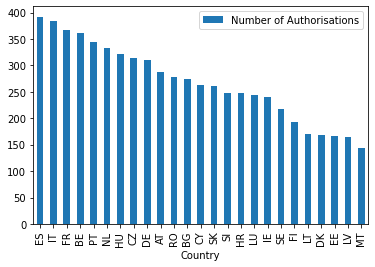

In [93]:
countries_number_authorisations_df = pd.DataFrame(country_numberofauthorisations, columns = ['Country', 'Number of Authorisations'])
# Sort these in descending order, highest no. of authorisations first
countries_number_authorisations_df.sort_values(by=['Number of Authorisations'], inplace=True, ascending=False)
# Print this final dataframe.
print(countries_number_authorisations_df.to_string(index=False))
# Use matplotlib to plot a bar chart demonstrate visually which countries have authorised the use of most pesticides
countries_number_authorisations_df.plot(x ='Country', y='Number of Authorisations', kind = 'bar')
plt.show()

<AxesSubplot:xlabel='Country', ylabel='Number of Authorisations'>

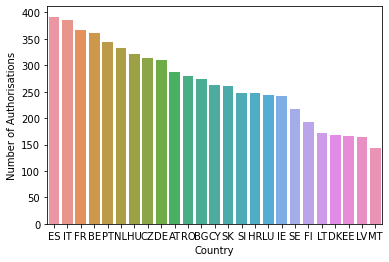

In [94]:
sns.barplot(x='Country', y ='Number of Authorisations', data=countries_number_authorisations_df,)

<AxesSubplot:xlabel='Number of Authorisations', ylabel='Country'>

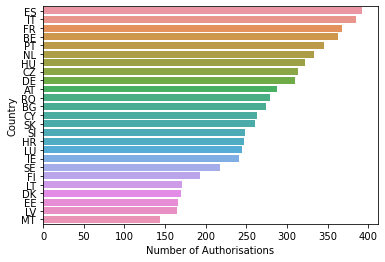

In [95]:
sns.barplot(y='Country', x ='Number of Authorisations', data=countries_number_authorisations_df,)

In [115]:
countries_number_authorisations_df.describe()

,Number of Authorisations
count,25.000000
mean,268.000000
std,73.912674
min,144.000000
25%,218.000000
50%,263.000000
75%,322.000000
max,392.000000


In [113]:
countries_number_authorisations_df.dtypes

Country                     object
Number of Authorisations     int64
dtype: object